<a href="https://colab.research.google.com/github/Sai24-r/Customer-Purchase-Prediction-Using-ML/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv('/content/customer_purchase_data.csv')
print(df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [4]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [5]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
## Checking for null values
df.isnull().sum()

## there are no missing values

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
## duplicate values
duplicates=df[df.duplicated()]
print(duplicates)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
243    57       1   79069.053493                  8                4   
271    43       0  101042.774561                 14                4   
299    65       1   55499.205296                 20                4   
304    50       0   41425.926045                  6                0   
306    56       1   48679.553852                 17                1   
...   ...     ...            ...                ...              ...   
1461   67       1  110466.885362                 17                0   
1484   68       0   80311.223269                 14                2   
1485   21       1  120794.999552                 10                0   
1492   63       0   71874.591294                 10                2   
1493   34       1   20418.374269                  9                1   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
243            43.221622               0                 2

In [ ]:
## Removing duplicates
df=df.drop_duplicates()

In [ ]:
## Print new Data frame
print(df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [6]:
# Encode categorical variables using LabelEncoder
encoder = LabelEncoder()
encoded_df = df.apply(encoder.fit_transform)

In [ ]:
# Separate features and target variable
X = encoded_df.drop(columns=['PurchaseStatus'])
y = encoded_df['PurchaseStatus']

In [ ]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Remove stratify=y

In [ ]:
# Step 4: Train a Decision Tree Classifier - used to evaluate the quality of the script
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Step 5: Visualize the decision tree structure (Textual format)
tree_rules = export_text(classifier, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- TimeSpentOnWebsite <= 657.50
|   |--- LoyaltyProgram <= 0.50
|   |   |--- DiscountsAvailed <= 2.50
|   |   |   |--- class: 0
|   |   |--- DiscountsAvailed >  2.50
|   |   |   |--- class: 0
|   |--- LoyaltyProgram >  0.50
|   |   |--- DiscountsAvailed <= 2.50
|   |   |   |--- class: 0
|   |   |--- DiscountsAvailed >  2.50
|   |   |   |--- class: 1
|--- TimeSpentOnWebsite >  657.50
|   |--- DiscountsAvailed <= 2.50
|   |   |--- Age <= 21.50
|   |   |   |--- class: 1
|   |   |--- Age >  21.50
|   |   |   |--- class: 0
|   |--- DiscountsAvailed >  2.50
|   |   |--- AnnualIncome <= 336.00
|   |   |   |--- class: 1
|   |   |--- AnnualIncome >  336.00
|   |   |   |--- class: 1



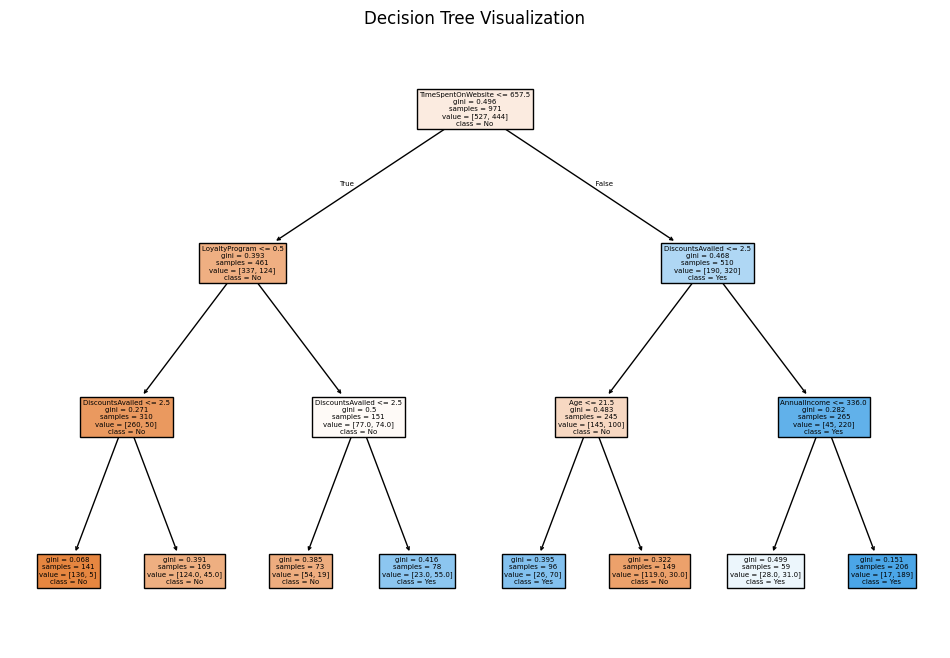

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree Classifier: 75.30%



Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.78      0.76       213
         Yes       0.76      0.72      0.74       204

    accuracy                           0.75       417
   macro avg       0.75      0.75      0.75       417
weighted avg       0.75      0.75      0.75       417

Decision Tree Classifier:
 Accuracy: 0.7529976019184652
 Precision: 0.7616580310880829
 Recall: 0.7205882352941176
 F1 Score: 0.7405541561712846


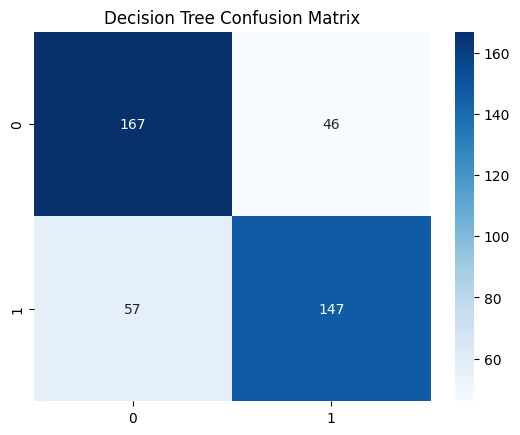

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

print(f'Decision Tree Classifier:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1_score}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

# Train model
logistic_regression.fit(X_train, y_train)

# Make predictions
lr_pred = logistic_regression.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print("Precision Score:", precision_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.7002398081534772
Confusion Matrix:
 [[145  68]
 [ 57 147]]
F1 Score: 0.7016706443914081
Precision Score: 0.6837209302325581


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine:
 Accuracy: 0.6522781774580336
 Precision: 0.6745562130177515
 Recall: 0.5588235294117647
 F1 Score: 0.6112600536193029


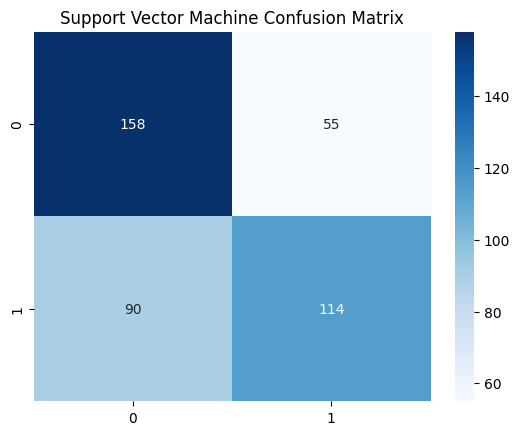

In [ ]:
# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# SVM Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

Naive Bayes:
 Accuracy: 0.8633093525179856
 Precision: 0.8848167539267016
 Recall: 0.8284313725490197
 F1 Score: 0.8556962025316456


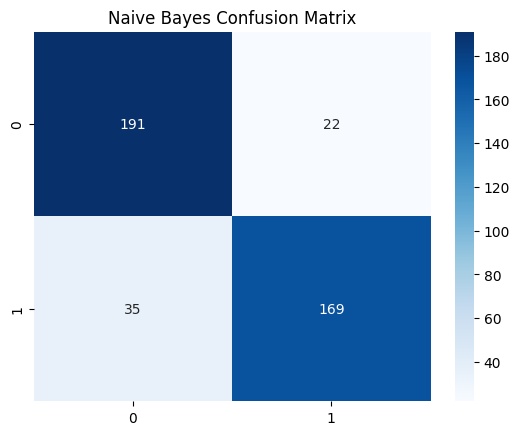

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Naive Bayes Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f'Naive Bayes:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

Random Forest:
 Accuracy: 0.9232613908872902
 Precision: 0.9526315789473684
 Recall: 0.8872549019607843
 F1 Score: 0.9187817258883249


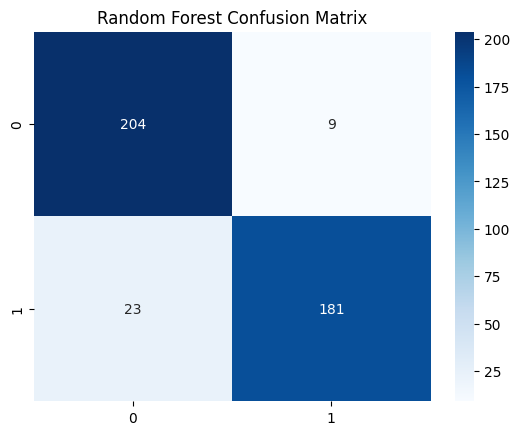

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()